In [1]:
from sympy import *
init_printing()
import sympy.vector as sv

In [2]:
x, y, z, t = symbols('x y z t')
R = sv.CoordSys3D('R')

In [3]:
def v(x,y,z): # vector field as a function of scalar variables x,y,z 
    return x*y*R.i + 2*y*z*R.j + 3*x*z*R.k

In [4]:
def voft(l): # vector field along path l as a function of t
    x,y,z = (l.dot(R.i),l.dot(R.j),l.dot(R.k)) # x,y,z as functions of t 
    return v(x,y,z)

In [5]:
def li(l,v): # dl/dt
    dl = diff(l,t)
    return integrate(voft(l).dot(dl),(t,0,1))

In [6]:
l1 = 2*t*R.j
l2 = 2*(1-t)*R.j + 2*t*R.k 
l3 = 2*(1-t)*R.k

In [7]:
li(l1,v),li(l2,v),li(l3,v)

In [8]:
l1,l2,l3

In [9]:
dl1 = diff(l1,t) 
dl2 = diff(l2,t) 
dl3 = diff(l3,t) 
dl1,dl2,dl3

In [10]:
 voft(l1),voft(l2),voft(l3)

In [11]:
voft(l1).dot(l1),voft(l2).dot(l2),voft(l3).dot(l3)

In [12]:
integrate(voft(l2).dot(dl2),(t,0,1))

A contour is a finite collection of paths joined end to end. A path can be represented as a continuous function form an closed iterval to $\mathbb{C}$ as follows 
$$ \gamma: [a~ b]\subset \mathbb{R} \to \mathbb{C}; \quad \gamma = \gamma(t)$$ 
Then the integration of any complex function along this path is is given by 
$$\int_\gamma f(z)dz = \int_a^b f(t)~\gamma'(t)~dt = \sum_{i=1}^n f(t_i) \left[\gamma(t_i)-\gamma(t_{i-1})\right]$$

**Question:** Find the integration of $f(z)=z^2$ along the parabolic path from $0$ to $1$.

**Answer:** In order to find the integration we have to find to parametrize the curve as $\gamma(t)=t+t^2i$, $t\in [0,1]$.

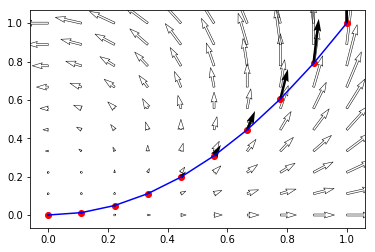

In [86]:
%matplotlib inline 
import numpy as np
from matplotlib import pyplot as plt
x,y,t = symbols("x y t")
def γ(t):
    return t + t**2 * 1j

def f(z):
    return z*z

# arr = np.linspace(0, 1, 10)
# cnums = [γ(t) for t in arr]
# imgs = [f(z) for z in cnums]

arr = np.linspace(0, 1, 10)
# Y = np.linspace(0, 1, 10)
X, Y = np.meshgrid(arr, arr)

U = X**2 - Y**2
V = 2*X*Y


plt.quiver(X, Y, U, V,edgecolor='k', facecolor='None', linewidth=.5)

cnums = np.array(list(map(γ, arr  )))
imgs  = np.array(list(map(f, cnums)))
X_0 = list(map(lambda z: z.real, cnums))
Y_0 = list(map(lambda z: z.imag, cnums))
U_0 = list(map(lambda z: z.real, imgs))
V_0 = list(map(lambda z: z.imag, imgs))

plt.plot(X_0, Y_0, color='blue')
plt.scatter(X_0, Y_0, color='red')
plt.quiver(X_0,Y_0,U_0,V_0)

plt.show()
# [(f(x+1j*y).real, f(x+1j*y).imag) for x in X for y in Y ]

Here we will do the numerical computation

In [82]:
Δt = cnums[1:]-cnums[:-1]
np.dot(imgs[1:],Δt)

(-0.6818686799806022+0.675438053988273j)

Now we do the same computation using integration

In [21]:
integrate(f(γ(t))*diff(γ(t), t),(t,0,1))

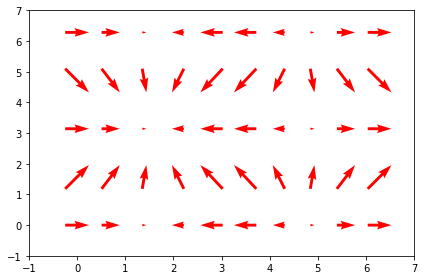

In [69]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

X, Y = np.mgrid[:2*np.pi:10j,:2*np.pi:5j]
U = np.cos(X)
V = np.sin(Y)

fig, ax = plt.subplots(1,1)
Q = ax.quiver(X, Y, U, V, pivot='mid', color='r', units='inches')

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)

def update_quiver(num, Q, X, Y):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    U = np.cos(X + num*0.1)
    V = np.sin(Y + num*0.1)

    Q.set_UVC(U,V)

    return Q

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y),
                               interval=50, blit=False)
fig.tight_layout()
plt.show()

In [ ]:
import plotly.plotly as py
from plotly.grid_objs import Grid, Column

import time

column_1 = Column([0.9, 1.1], 'x')
column_2 = Column([1.0, 1.0], 'y')
column_3 = Column([0.8, 1.2], 'x2')
column_4 = Column([1.2, 0.8], 'y2')
column_5 = Column([0.7, 1.3], 'x3')
column_6 = Column([0.7, 1.3], 'y3')
column_7 = Column([0.6, 1.4], 'x4')
column_8 = Column([1.5, 0.5], 'y4')
column_9 = Column([0.4, 1.6], 'x5')
column_10 = Column([1.2, 0.8], 'y5')

grid = Grid([column_1, column_2, column_3, column_4, column_5,
             column_6, column_7, column_8, column_9, column_10])
py.grid_ops.upload(grid, 'points_changing_size_grid'+str(time.time()), auto_open=False)

# create figure
figure = {
    'data': [
        {
            'xsrc': grid.get_column_reference('x'),
            'ysrc': grid.get_column_reference('y'),
            'mode': 'markers',
            'marker': {'color': '#48186a', 'size': 10}
        }
    ],
    'layout': {'title': 'Growing Circles',
               'xaxis': {'range': [0, 2], 'autorange': False},
               'yaxis': {'range': [0, 2], 'autorange': False},
               'updatemenus': [{
                   'buttons': [
                       {'args': [None],
                        'label': 'Play',
                        'method': 'animate'}
               ],
               'pad': {'r': 10, 't': 87},
               'showactive': False,
               'type': 'buttons'
                }]},
    'frames': [
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference('x2'),
                    'ysrc': grid.get_column_reference('y2'),
                    'mode': 'markers',
                    'marker': {'color': '#3b528b', 'size': 25}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference('x3'),
                    'ysrc': grid.get_column_reference('y3'),
                    'mode': 'markers',
                    'marker': {'color': '#26828e', 'size': 50}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference('x4'),
                    'ysrc': grid.get_column_reference('y4'),
                    'mode': 'markers',
                    'marker': {'color': '#5ec962', 'size': 80}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference('x5'),
                    'ysrc': grid.get_column_reference('y5'),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 100}
                }
            ]
        }
    ]
}
py.icreate_animations(figure, 'points_changing_size'+str(time.time()))

In [1]:
import plotly
plotly.__version__

'3.7.0'